<a href="https://colab.research.google.com/github/akidss/Sentiment-Analysis-Labelling-process-with-TextBlob-and-Using-Support-vector-machine-method-/blob/main/try_labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tweet-preprocessor

In [ ]:
pip install textblob

In [ ]:
pip install wordcloud

In [ ]:
pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib as plt
import numpy as np
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv("/content/data_prep.csv")
df

,full_text,username,created_at
0,perundungan sebuah video aksi perundungan seor...,detik_sumbagsel,Fri Sep 20 04:11:59 +0000 2024
1,saudara perempuan cocok buat lagi nyari bacaa...,thisylus,Wed Sep 18 13:08:46 +0000 2024
2,bojonegoro polri polri edukasi diharapkan sis...,MulyonoVideo,Wed Sep 18 04:21:23 +0000 2024
3,geger tuduhan bullying brandoville studio vira...,ibenewsid,Tue Sep 17 12:10:51 +0000 2024
4,apa jenisnya bullying verbal menghina bentuk...,nznalmairra,Tue Sep 17 09:42:36 +0000 2024
...,...,...,...
775,respbg waspadai kasus kejahatan banyak terjad...,HPadamara,Fri Mar 12 04:37:25 +0000 2021
776,sampang era teknologi sekarang kejahatan mara...,Finae20,Fri Mar 12 04:37:16 +0000 2021
777,era teknologi sekarang kejahatan marak terjadi...,restabengkulu,Fri Mar 12 04:37:06 +0000 2021
778,respbg waspadai kasus kejahatan banyak terjad...,HPadamara,Fri Mar 12 04:37:00 +0000 2021


In [ ]:
data_tweet = list(df['full_text'])
polaritas = 0
status = []
total_positif = total_negatif = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity
    if analysis.sentiment.polarity >0.0:
        total_positif += 1
        status.append('Positif')
    else:
        total_negatif += 1
        status.append('Negatif')
    total += 1

print(f'Hasil Analysis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data   :{total}')

Hasil Analysis Data:
Positif = 44
Negatif = 736

Total Data   :780


In [ ]:
df['clasiffied'] = status
df

,full_text,username,created_at,clasiffied
0,perundungan sebuah video aksi perundungan seor...,detik_sumbagsel,Fri Sep 20 04:11:59 +0000 2024,Negatif
1,saudara perempuan cocok buat lagi nyari bacaa...,thisylus,Wed Sep 18 13:08:46 +0000 2024,Positif
2,bojonegoro polri polri edukasi diharapkan sis...,MulyonoVideo,Wed Sep 18 04:21:23 +0000 2024,Negatif
3,geger tuduhan bullying brandoville studio vira...,ibenewsid,Tue Sep 17 12:10:51 +0000 2024,Negatif
4,apa jenisnya bullying verbal menghina bentuk...,nznalmairra,Tue Sep 17 09:42:36 +0000 2024,Negatif
...,...,...,...,...
775,respbg waspadai kasus kejahatan banyak terjad...,HPadamara,Fri Mar 12 04:37:25 +0000 2021,Negatif
776,sampang era teknologi sekarang kejahatan mara...,Finae20,Fri Mar 12 04:37:16 +0000 2021,Negatif
777,era teknologi sekarang kejahatan marak terjadi...,restabengkulu,Fri Mar 12 04:37:06 +0000 2021,Negatif
778,respbg waspadai kasus kejahatan banyak terjad...,HPadamara,Fri Mar 12 04:37:00 +0000 2021,Negatif


In [ ]:
df.to_csv('data_labelling.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['full_text']

# Change 'x' to 'X' in the train_test_split function call
X_train, X_test, y_train, y_test = train_test_split(X, df['clasiffied'], test_size=0.2, random_state=100)
print("Train: ",X_train.shape, y_train.shape, "Test: ",(X_test.shape,y_test.shape))

Train:  (624,) (624,) Test:  ((156,), (156,))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# ... (your existing code to load and prepare data) ...

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform it
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Create and train the SVC model
clf = SVC(C=1.0, kernel='rbf')
clf.fit(X_train_tfidf, y_train) # Use the transformed training data

# ... (rest of your code for prediction and evaluation) ...

SVC()

In [ ]:
#melakukan prediksi terhadap data x-Test
# Use the TF-IDF vectorizer to transform X_test before prediction
X_test_tfidf = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_tfidf)

#melakukan evaluasi menggunakan confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix SVM")
print(confusion_matrix(y_test, y_pred))
print("Classification Report SVM")
print(classification_report(y_test, y_pred, zero_division=0))
from sklearn.metrics import accuracy_score
acu_dt=accuracy_score(y_test, y_pred)


print("Akurasi SVM: ", acu_dt)

Confusion Matrix SVM
[[148   0]
 [  8   0]]
Classification Report SVM
              precision    recall  f1-score   support

     Negatif       0.95      1.00      0.97       148
     Positif       0.00      0.00      0.00         8

    accuracy                           0.95       156
   macro avg       0.47      0.50      0.49       156
weighted avg       0.90      0.95      0.92       156

Akurasi SVM:  0.9487179487179487


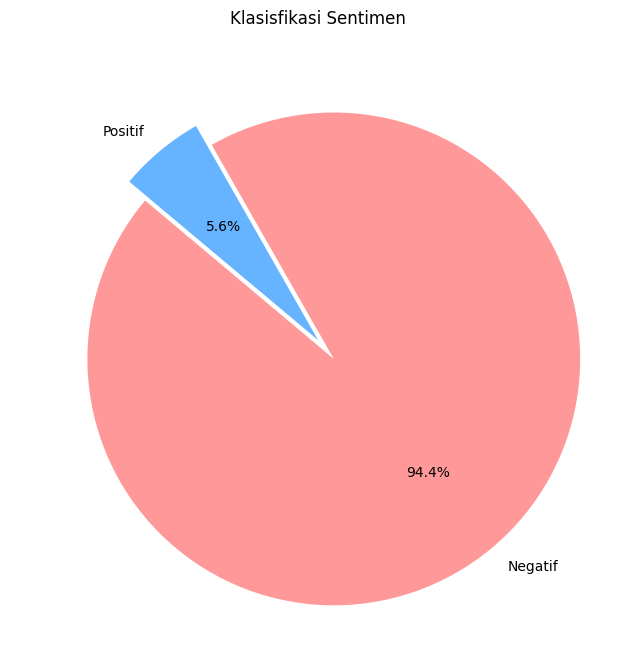

In [ ]:
import matplotlib.pyplot as plt

labels = df['clasiffied'] # Kategori data  # Enclose 'clasiffied' in quotes
sizes = df['clasiffied'].value_counts()  # Nilai untuk setiap kategori, use value_counts() for counts
colors = ['#ff9999', '#66b3ff']  # Warna untuk setiap kategori
explode = (0.1, 0)  # Adjust explode to match the number of categories

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels.unique(), colors=colors, explode=explode, autopct='%1.1f%%', startangle=140) # Use labels.unique() for unique labels
plt.title('Klasisfikasi Sentimen')
plt.show()

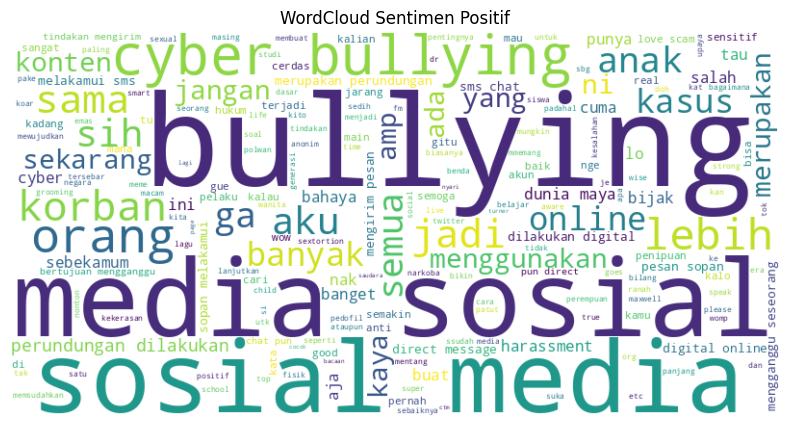

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_texts = ' '.join(df[df['clasiffied'] == 'Positif']['full_text'])


# Generate WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(positive_texts)

# Visualisasi WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Sentimen Positif")
plt.show()

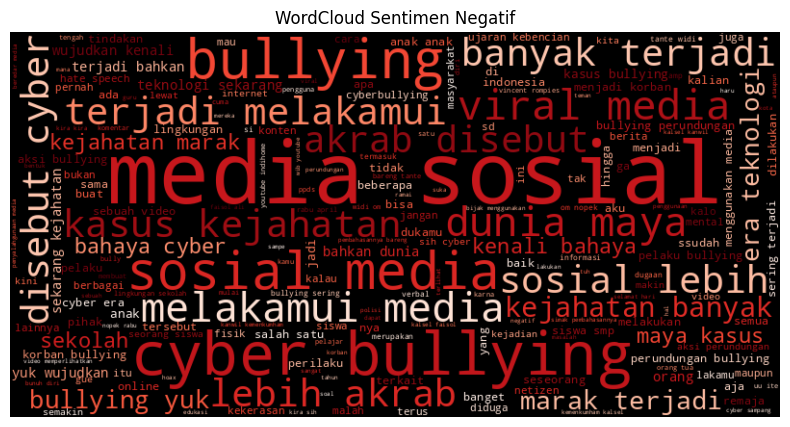

In [ ]:
negative_texts = ' '.join(df[df['clasiffied'] == 'Negatif']['full_text'])

# Generate WordCloud untuk sentimen negatif
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',  # Latar belakang hitam untuk kesan berbeda
    colormap='Reds'  # Warna merah untuk mencerminkan sentimen negatif
).generate(negative_texts)

# Visualisasi WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Sentimen Negatif")
plt.show()
